# ProHack Competition: Predicting Galaxies Growth Index

## Competition Objectives

**Objective 1:** Predict Galaxy Growth Index

- · To understand what makes us better off.

> Quote: "Our elders used the composite index to measure our well-being performance, but this knowledge has disappeared in the sands of time."

Use our data and train your model to predict this index with the highest possible level of certainty.

**Objective 2:** Optimize Energy Allocation

- · To achieve the highest possible level of well-being through optimized allocation of additional energy

## Approach To Solution

The following steps are used in building a prediction model and evaluate its performance

- Perform Exploratory Data Analysis
- Build a Baseline Model to base selection of algorithms
- Perform Feature Engineering: Data Transformation and Selection of Important Features
- Modelling
- Hyperparameter Tuning
- Model Evalution
- Creating Submission File

# 1. Data Preprocessing

**Install Packages**

In [ ]:
!python -m pip install mice

In [ ]:
!python -m pip install fancyimpute

In [ ]:
!python -m pip install feature-selector

In [ ]:
!pip install lightgbm

## 1.1 Load Libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#import matplotlib.pylab as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import plotly
from math import *

#import xgboost
import xgboost as xgb
import csv as csv
from xgboost import plot_importance

from scipy.stats import skew
from collections import OrderedDict

## 1.2 Load Data

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#train = train.drop('galaxy', axis=1)

df_train.head(10)

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247
5,990025,KKh 060,0.824692,63.887135,28409.062695,0.671697,14.062458,9.978597,0.815264,0.796807,...,NaN,NaN,NaN,NaN,NaN,40.118699,3.981105,21.012897,NaN,0.052871
6,990025,Grus II,0.657457,68.555326,25648.328827,0.745674,15.434546,10.021786,0.662192,0.743891,...,NaN,NaN,NaN,NaN,NaN,12.984996,4.320539,NaN,NaN,0.052780
7,990025,UGCA 292,0.951043,75.693397,20935.541513,0.947961,14.862880,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.191899,NaN,NaN,0.062652
8,990025,Aquarius II,0.657402,61.337084,18231.029378,0.826377,15.173325,6.941815,0.725536,0.647240,...,NaN,NaN,NaN,NaN,NaN,-4.709357,6.151802,NaN,NaN,0.053927
9,990025,Andromeda XI,0.657180,62.554929,16196.125655,0.679096,12.937281,6.529242,0.561520,0.482450,...,NaN,NaN,NaN,NaN,NaN,8.731994,6.684401,NaN,NaN,0.050588


In [4]:
df_train.shape

(3865, 80)

In [5]:
df_test.shape

(890, 79)

In [ ]:
#df_train.columns

In [6]:
df_train.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3.865000e+03,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,3432.000000,...,916.000000,915.000000,914.000000,893.000000,892.000000,912.000000,941.000000,874.000000,844.000000,3865.000000
mean,1.000709e+06,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,135.129178,...,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733,0.082773
std,6.945463e+03,0.162367,10.461654,18736.378445,0.194055,3.612546,3.319948,0.176242,0.199795,52.449535,...,0.185780,0.159041,0.087299,46.269362,46.795666,14.258986,4.804873,34.342797,0.205785,0.063415
min,9.900250e+05,0.227890,34.244062,-126.906522,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,...,0.305733,0.369519,0.465177,23.224603,16.215151,-76.741414,-1.192011,-735.186886,0.089092,0.013036
25%,9.950060e+05,0.763027,69.961449,20169.118912,0.677131,12.592467,7.654169,0.671862,0.597746,92.262724,...,0.690707,0.731264,0.965800,84.090816,82.232550,15.001028,4.113472,17.227899,0.430332,0.047889
50%,1.000000e+06,0.907359,78.995101,26600.768195,0.827300,14.942913,10.385465,0.824758,0.761255,135.914318,...,0.835410,0.862773,1.029947,120.069916,121.057923,22.182571,5.309497,24.472557,0.624640,0.057820
75%,1.006009e+06,0.992760,84.558971,36898.631754,0.970295,17.123797,12.884752,0.939043,0.893505,175.301993,...,0.970365,0.961369,1.068481,158.579644,157.815625,29.134738,6.814577,31.748295,0.767404,0.087389
max,1.015056e+06,1.246908,100.210053,151072.683156,1.361883,26.955944,19.057648,1.232814,1.269625,278.786613,...,1.237661,1.182746,1.181230,232.720847,233.915373,61.903641,36.538462,95.941245,1.098439,0.683813


In [ ]:
def describe_data(df_train):
    print("Data Types:")
    print(df_train.dtypes)
    print("Rows and Columns:")
    print(df_train.shape)
    print("Column Names:")
    print(df_train.columns)
    print("Null Values:")
    print(df_train.apply(lambda x: sum(x.isnull()) / len(df_train)))
describe_data(df_train)

In [ ]:
#df_train.nunique()

In [7]:
# count the number of nan values in each column
print(df_train.isnull().sum())

galactic year                                                                          0
galaxy                                                                                 0
existence expectancy index                                                             1
existence expectancy at birth                                                          1
Gross income per capita                                                               28
Income Index                                                                          28
Expected years of education (galactic years)                                         133
Mean years of education (galactic years)                                             363
Intergalactic Development Index (IDI)                                                391
Education Index                                                                      391
Intergalactic Development Index (IDI), Rank                                          433
Population using at l

In [ ]:
# Select all duplicate rows based on all columns
duplicateRowsDF = df_test[df_train.duplicated(keep=False)]
print("All Duplicate Rows based on all columns are :")
duplicateRowsDF.head()

In [ ]:

print(df_test.isnull().sum())

### 1.3 Renaming Columns

In [8]:
# Rename Features

df_train1 = df_train.rename(columns = {'galactic year': 'GYear',    
       'galactic year': 'GYear' ,
       'existence expectancy index': 'EEI',
       'existence expectancy at birth': 'EEIatBirth' ,
       'Gross income per capita': 'GI_Per_Capita',
       'Expected years of education (galactic years)': 'E_GYrs_of_Edu',
       'Mean years of education (galactic years)': 'Mean_GYrs_of_Ed',
       'Intergalactic Development Index (IDI)': 'IDI', 
       'Intergalactic Development Index (IDI), Rank': 'IDI_Rank',
       'Population using at least basic drinking-water services (%)': '%Pop_with_dwater',
       'Population using at least basic sanitation services (%)': '%Pop_basic_sanit',
       'Gross capital formation (% of GGP)': 'GCF_%_of_GDP', 
       'Population, total (millions)': 'Pop_in_Millions',
       'Population, urban (%)': '%Urban_Pop',
       'Mortality rate, under-five (per 1,000 live births)': 'Mort_Rate_lt_5_per1K',
       'Mortality rate, infant (per 1,000 live births)': 'Mort_Rate_infant_per1K',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))': 'Old_Age_Dep',
       'Population, ages 15–64 (millions)': 'Adult_Pop_in_Mln',
       'Population, ages 65 and older (millions)': 'Pop_gt_65_in_Millions',
       'Life expectancy at birth, male (galactic years)': 'Life_Exp_at_Birth_M',
       'Life expectancy at birth, female (galactic years)': 'Life_Exp_at_Birth_F',
       'Population, under age 5 (millions)': 'Pop_lt_5(millions)',
       'Young age (0-14) dependency ratio (per 100 creatures ages 15-64)': 'Young_Age_Dep(0-14)',
       'Adolescent birth rate (births per 1,000 female creatures ages 15-19)': 'Adolesc_Birth_Rate(per1000females)',
       'Total unemployment rate (female to male ratio)': 'Tot_Unemployment_Rate(F:M_Ratio)',
       'Vulnerable employment (% of total employment)': 'Vulnerable_Emp(%_of_Tot_Emp)',
       'Unemployment, total (% of labour force)': 'Total Unemployment(% of labour force)',
       'Employment in agriculture (% of total employment)': 'Emp_Agri(%Tot)',
       'Labour force participation rate (% ages 15 and older)': 'Labour_Force%_Participation',
       'Labour force participation rate (% ages 15 and older), female': 'Labour_Force%_Participation_F',
       'Employment in services (% of total employment)': 'Emp_Services(%Tot)',
       'Labour force participation rate (% ages 15 and older), male': 'Labour_Force%_Participation_M',
       'Employment to population ratio (% ages 15 and older)': '%Empl_Ratio',
       'Jungle area (% of total land area)' : 'Jungle(%_of_Tot_Land_Area)',
       'Share of employment in nonagriculture, female (% of total employment in nonagriculture)' : '%Female_Emp_NonAgri',
       'Youth unemployment rate (female to male ratio)' : 'Youth_UnEmpl_Ratio(F:M)',
       'Unemployment, youth (% ages 15–24)' : '%UnEmpl_Youth(15-24)',
       'Mortality rate, female grown up (per 1,000 people)' : 'Mort_Rate_Adult_F_per1000',
       'Mortality rate, male grown up (per 1,000 people)' : 'Mort_Rate_Adult_M_per1000',
       'Infants lacking immunization, red hot disease (% of one-galactic year-olds)' : '%Infant_No_IMUN(Red_Hot_Dis)',
       'Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)' : '%Infant_No_Comb_Vaccine',
       'Gross galactic product (GGP) per capita' : 'per-capita_GGP',
       'Gross galactic product (GGP), total' : 'total Gross Gal_product',
       'Outer Galaxies direct investment, net inflows (% of GGP)' : 'FDI_Net_inflows(% of GGP)',
       'Exports and imports (% of GGP)' : 'Export_Import(% of GGP)',
       'Share of seats in senate (% held by female)' : '%_Female_Senate',
       'Natural resource depletion': 'Natural Resource Depl',
       'Mean years of education, female (galactic years)' : 'MeanGYears_of_Edu_F',
       'Mean years of education, male (galactic years)' : 'MeanGYears_of_Edu_M',
       'Expected years of education, female (galactic years)' : 'Exp_GYears_of_Edu_F',
       'Expected years of education, male (galactic years)' : 'Exp_GYears_of_Edu_M',
       'Maternal mortality ratio (deaths per 100,000 live births)' : 'Maternal_Mort_Ratio(deaths per 1000 live Births)',
       'Renewable energy consumption (% of total final energy consumption)' : 'Renewable Energy, % Total',
       'Estimated gross galactic income per capita, male' : 'Est Gross G_Income_per Capita (M)',
       'Estimated gross galactic income per capita, female' : 'Est Gross G_Income_per Capita (F)',
       'Rural population with access to electricity (%)' : '%Rural_Pop_with_Elec',
       'Domestic credit provided by financial sector (% of GGP)' : 'Bank Loans (% of GGP)',
       'Population with at least some secondary education, female (% ages 25 and older)' : '%F_Pop with Sec Edu (Age gt 25)',
       'Population with at least some secondary education, male (% ages 25 and older)' : '%M_Pop_with_Sec_Edu (Age gt 25)',
       'Gross fixed capital formation (% of GGP)' : 'Gross Fixed Capital Formation (% of GGP)',
       'Remittances, inflows (% of GGP)' : 'Remittances, inflows (% of GGP)',
       'Population with at least some secondary education (% ages 25 and older)' : '%Pop_with_Sec_Edu (Age gt 25)',
       'Intergalactic inbound tourists (thousands)' : 'No_of_Tourists(000s)',
       'Gross enrolment ratio, primary (% of primary under-age population)' : 'Gross Enrolment Ratio',
       'Respiratory disease incidence (per 100,000 people)' : 'Resp Disease Incd per1000',
       'Interstellar phone subscriptions (per 100 people)' : 'Phone Subscr per100',
       'Interstellar Data Net users, total (% of population)' : 'Total Data Net Users (% of Pop)',
       'Current health expenditure (% of GGP)' : 'Current Health Exp (% of GGP)',
       'Intergalactic Development Index (IDI), female' : 'Dev Index (IDI_F)',
       'Intergalactic Development Index (IDI), male' : 'Dev Index (IDI_M)',
       'Gender Development Index (GDI)' : 'Gender Development Index (GDI)',
       'Intergalactic Development Index (IDI), female, Rank' : 'Dev Index (IDI_F_Rank)',
       'Intergalactic Development Index (IDI), male, Rank' : 'Dev Index (IDI_M_Rank)',
       'Adjusted net savings ' : 'Adj Net savings',
       'Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total' : 'Immuno Disease Prev (% ages 15-49)',
       'Private galaxy capital flows (% of GGP)' : 'Private galaxy capital flows (% of GGP)',
       'Gender Inequality Index' : 'Gender Inequality Index'
})                  

In [9]:
# Rename Features

df_test1 = df_test.rename(columns = {'galactic year': 'GYear',    
       'galactic year': 'GYear' ,
       'existence expectancy index': 'EEI',
       'existence expectancy at birth': 'EEIatBirth' ,
       'Gross income per capita': 'GI_Per_Capita',
       'Expected years of education (galactic years)': 'E_GYrs_of_Edu',
       'Mean years of education (galactic years)': 'Mean_GYrs_of_Ed',
       'Intergalactic Development Index (IDI)': 'IDI', 
       'Intergalactic Development Index (IDI), Rank': 'IDI_Rank',
       'Population using at least basic drinking-water services (%)': '%Pop_with_dwater',
       'Population using at least basic sanitation services (%)': '%Pop_basic_sanit',
       'Gross capital formation (% of GGP)': 'GCF_%_of_GDP', 
       'Population, total (millions)': 'Pop_in_Millions',
       'Population, urban (%)': '%Urban_Pop',
       'Mortality rate, under-five (per 1,000 live births)': 'Mort_Rate_lt_5_per1K',
       'Mortality rate, infant (per 1,000 live births)': 'Mort_Rate_infant_per1K',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))': 'Old_Age_Dep',
       'Population, ages 15–64 (millions)': 'Adult_Pop_in_Mln',
       'Population, ages 65 and older (millions)': 'Pop_gt_65_in_Millions',
       'Life expectancy at birth, male (galactic years)': 'Life_Exp_at_Birth_M',
       'Life expectancy at birth, female (galactic years)': 'Life_Exp_at_Birth_F',
       'Population, under age 5 (millions)': 'Pop_lt_5(millions)',
       'Young age (0-14) dependency ratio (per 100 creatures ages 15-64)': 'Young_Age_Dep(0-14)',
       'Adolescent birth rate (births per 1,000 female creatures ages 15-19)': 'Adolesc_Birth_Rate(per1000females)',
       'Total unemployment rate (female to male ratio)': 'Tot_Unemployment_Rate(F:M_Ratio)',
       'Vulnerable employment (% of total employment)': 'Vulnerable_Emp(%_of_Tot_Emp)',
       'Unemployment, total (% of labour force)': 'Total Unemployment(% of labour force)',
       'Employment in agriculture (% of total employment)': 'Emp_Agri(%Tot)',
       'Labour force participation rate (% ages 15 and older)': 'Labour_Force%_Participation',
       'Labour force participation rate (% ages 15 and older), female': 'Labour_Force%_Participation_F',
       'Employment in services (% of total employment)': 'Emp_Services(%Tot)',
       'Labour force participation rate (% ages 15 and older), male': 'Labour_Force%_Participation_M',
       'Employment to population ratio (% ages 15 and older)': '%Empl_Ratio',
       'Jungle area (% of total land area)' : 'Jungle(%_of_Tot_Land_Area)',
       'Share of employment in nonagriculture, female (% of total employment in nonagriculture)' : '%Female_Emp_NonAgri',
       'Youth unemployment rate (female to male ratio)' : 'Youth_UnEmpl_Ratio(F:M)',
       'Unemployment, youth (% ages 15–24)' : '%UnEmpl_Youth(15-24)',
       'Mortality rate, female grown up (per 1,000 people)' : 'Mort_Rate_Adult_F_per1000',
       'Mortality rate, male grown up (per 1,000 people)' : 'Mort_Rate_Adult_M_per1000',
       'Infants lacking immunization, red hot disease (% of one-galactic year-olds)' : '%Infant_No_IMUN(Red_Hot_Dis)',
       'Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)' : '%Infant_No_Comb_Vaccine',
       'Gross galactic product (GGP) per capita' : 'per-capita_GGP',
       'Gross galactic product (GGP), total' : 'total Gross Gal_product',
       'Outer Galaxies direct investment, net inflows (% of GGP)' : 'FDI_Net_inflows(% of GGP)',
       'Exports and imports (% of GGP)' : 'Export_Import(% of GGP)',
       'Share of seats in senate (% held by female)' : '%_Female_Senate',
       'Natural resource depletion': 'Natural Resource Depl',
       'Mean years of education, female (galactic years)' : 'MeanGYears_of_Edu_F',
       'Mean years of education, male (galactic years)' : 'MeanGYears_of_Edu_M',
       'Expected years of education, female (galactic years)' : 'Exp_GYears_of_Edu_F',
       'Expected years of education, male (galactic years)' : 'Exp_GYears_of_Edu_M',
       'Maternal mortality ratio (deaths per 100,000 live births)' : 'Maternal_Mort_Ratio(deaths per 1000 live Births)',
       'Renewable energy consumption (% of total final energy consumption)' : 'Renewable Energy, % Total',
       'Estimated gross galactic income per capita, male' : 'Est Gross G_Income_per Capita (M)',
       'Estimated gross galactic income per capita, female' : 'Est Gross G_Income_per Capita (F)',
       'Rural population with access to electricity (%)' : '%Rural_Pop_with_Elec',
       'Domestic credit provided by financial sector (% of GGP)' : 'Bank Loans (% of GGP)',
       'Population with at least some secondary education, female (% ages 25 and older)' : '%F_Pop with Sec Edu (Age gt 25)',
       'Population with at least some secondary education, male (% ages 25 and older)' : '%M_Pop_with_Sec_Edu (Age gt 25)',
       'Gross fixed capital formation (% of GGP)' : 'Gross Fixed Capital Formation (% of GGP)',
       'Remittances, inflows (% of GGP)' : 'Remittances, inflows (% of GGP)',
       'Population with at least some secondary education (% ages 25 and older)' : '%Pop_with_Sec_Edu (Age gt 25)',
       'Intergalactic inbound tourists (thousands)' : 'No_of_Tourists(000s)',
       'Gross enrolment ratio, primary (% of primary under-age population)' : 'Gross Enrolment Ratio',
       'Respiratory disease incidence (per 100,000 people)' : 'Resp Disease Incd per1000',
       'Interstellar phone subscriptions (per 100 people)' : 'Phone Subscr per100',
       'Interstellar Data Net users, total (% of population)' : 'Total Data Net Users (% of Pop)',
       'Current health expenditure (% of GGP)' : 'Current Health Exp (% of GGP)',
       'Intergalactic Development Index (IDI), female' : 'Dev Index (IDI_F)',
       'Intergalactic Development Index (IDI), male' : 'Dev Index (IDI_M)',
       'Gender Development Index (GDI)' : 'Gender Development Index (GDI)',
       'Intergalactic Development Index (IDI), female, Rank' : 'Dev Index (IDI_F_Rank)',
       'Intergalactic Development Index (IDI), male, Rank' : 'Dev Index (IDI_M_Rank)',
       'Adjusted net savings ' : 'Adj Net savings',
       'Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total' : 'Immuno Disease Prev (% ages 15-49)',
       'Private galaxy capital flows (% of GGP)' : 'Private galaxy capital flows (% of GGP)',
       'Gender Inequality Index' : 'Gender Inequality Index'
})                  

In [10]:
df_train1.shape

(3865, 80)

In [11]:
df_test1.shape

(890, 79)

In [12]:
len(df_train1['GYear'].unique().tolist())

26

In [13]:
print(min(df_train1['GYear'])," to ",max(df_train1['GYear']))

990025  to  1015056


In [14]:
len(df_train1['galaxy'].unique().tolist())

181

In [ ]:
#df_train1.info()

## 1.4 Adding Energy Features

- Potential for increase in the Index = -np.log(Index+0.01)+3

- Likely increase in the Index = extra energy * Potential for increase in the Index **2 / 1000

#### Potential for increase in the Index

In [15]:
df_train1["Index_Potential_Max"] = -np.log(df_train1.y+0.01) +3
#df_train1.head()

#### Allocated Energy

**There are also several constraints:**

- In total there are 50000 zillion DSML available for allocation
- No galaxy should be allocated more than 100 zillion DSML or less than 0 zillion DSML
- Galaxies with low existence expectancy index below 0.7 should be allocated at least 10% of the total energy available

In [ ]:
# TODO: No galaxy should be allocated more than 100 zillion DSML or less than 0 zillion DSML
# TODO: Write a function

# TODO: Galaxies with low existence expectancy index below 0.7 should be allocated at least 10% of the total energy available
# TODO: Write a function

# Potential for increase in the Index 



#Extra_Energy = todo

### Creating Required Columns For Extra Energy and Predicted Likely Increase

In [16]:
Extra_Energy = 100
a = 1000

df_train1["Likely Index Increase"] = (Extra_Energy * (df_train1["Index_Potential_Max"])**2)/a

In [17]:
np.random.seed(42)
df_train1['Energy Allocation'] = np.random.randint(0, 100, size=len(df_train1))

In [18]:
# TODO: Galaxies with low existence expectancy index below 0.7 should be allocated at least 10% of the total energy available
df_train1.loc[df_train1["EEI"] < .7, ["Energy Allocation"]] = Extra_Energy*.01

In [19]:
df_train1.head(10)

,GYear,galaxy,EEI,EEIatBirth,GI_Per_Capita,Income Index,E_GYrs_of_Edu,Mean_GYrs_of_Ed,IDI,Education Index,...,Dev Index (IDI_F_Rank),Dev Index (IDI_M_Rank),Adj Net savings,Immuno Disease Prev (% ages 15-49),Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y,Index_Potential_Max,Likely Index Increase,Energy Allocation
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.052590,5.771153,3.330621,1.0
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868,5.661147,3.204859,92.0
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449,5.805954,3.370910,1.0
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394,5.823558,3.391383,1.0
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247,4.806384,2.310133,60.0
5,990025,KKh 060,0.824692,63.887135,28409.062695,0.671697,14.062458,9.978597,0.815264,0.796807,...,NaN,NaN,40.118699,3.981105,21.012897,NaN,0.052871,5.766676,3.325455,20.0
6,990025,Grus II,0.657457,68.555326,25648.328827,0.745674,15.434546,10.021786,0.662192,0.743891,...,NaN,NaN,12.984996,4.320539,NaN,NaN,0.052780,5.768115,3.327115,1.0
7,990025,UGCA 292,0.951043,75.693397,20935.541513,0.947961,14.862880,NaN,NaN,NaN,...,NaN,NaN,NaN,4.191899,NaN,NaN,0.062652,5.622074,3.160772,86.0
8,990025,Aquarius II,0.657402,61.337084,18231.029378,0.826377,15.173325,6.941815,0.725536,0.647240,...,NaN,NaN,-4.709357,6.151802,NaN,NaN,0.053927,5.750011,3.306263,1.0
9,990025,Andromeda XI,0.657180,62.554929,16196.125655,0.679096,12.937281,6.529242,0.561520,0.482450,...,NaN,NaN,8.731994,6.684401,NaN,NaN,0.050588,5.803655,3.368241,1.0


#### Likely increase in the Index: Predicted?

In [ ]:
# Adding Column Likely increase in the Index
#df_train['Likely Index Increase'] = df_train.eval('extra energy * Potential Index Increase **2 / 1000')


### 1.5 Dropping Columns

In [20]:
# dropping passed columns 
df_train2 = df_train1.drop(["galaxy"], axis = 1)
df_train2.head()

,GYear,EEI,EEIatBirth,GI_Per_Capita,Income Index,E_GYrs_of_Edu,Mean_GYrs_of_Ed,IDI,Education Index,IDI_Rank,...,Dev Index (IDI_F_Rank),Dev Index (IDI_M_Rank),Adj Net savings,Immuno Disease Prev (% ages 15-49),Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y,Index_Potential_Max,Likely Index Increase,Energy Allocation
0,990025,0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.052590,5.771153,3.330621,1.0
1,990025,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,...,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868,5.661147,3.204859,92.0
2,990025,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,...,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449,5.805954,3.370910,1.0
3,990025,0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394,5.823558,3.391383,1.0
4,990025,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,...,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247,4.806384,2.310133,60.0


In [21]:
# dropping passed columns 
df_test2 = df_test1.drop(["galaxy"], axis = 1)

### 1.6 Dropping NAs

In [22]:
trimmed_df1 = df_train2.dropna()

trimmed_df2 = df_test2.dropna()

In [23]:
trimmed_df1.shape

(334, 82)

In [24]:
trimmed_df2.shape

(234, 78)

In [25]:
trimmed_df1.head()

,GYear,EEI,EEIatBirth,GI_Per_Capita,Income Index,E_GYrs_of_Edu,Mean_GYrs_of_Ed,IDI,Education Index,IDI_Rank,...,Dev Index (IDI_F_Rank),Dev Index (IDI_M_Rank),Adj Net savings,Immuno Disease Prev (% ages 15-49),Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y,Index_Potential_Max,Likely Index Increase,Energy Allocation
1806,1000000,0.689316,65.638091,15088.072865,0.886753,15.136626,12.777039,0.751931,0.848223,157.189161,...,114.110048,156.344873,9.792015,18.591266,30.336116,0.503575,0.050369,5.807276,3.372445,1.0
1814,1000000,0.690273,62.438111,22524.652152,0.520520,12.659825,7.604448,0.608262,0.577814,189.642778,...,174.950196,166.649398,21.369380,2.258941,20.659666,0.824864,0.047920,5.848695,3.420723,1.0
1817,1000000,1.055824,87.572474,35478.761084,0.889595,18.034259,12.481260,0.951648,0.967120,100.924078,...,90.403900,55.715254,19.438685,3.488755,28.197710,0.602528,0.085177,5.352019,2.864410,11.0
1824,1000000,1.061596,85.128977,21120.552199,0.679580,15.279956,13.228658,0.779531,0.950648,123.076566,...,160.459662,145.505845,4.419405,2.969704,15.128145,0.659367,0.081248,5.394172,2.909709,16.0
1826,1000000,0.691074,65.679071,20590.608266,0.545087,9.581990,6.505547,0.580999,0.432198,178.118196,...,146.877670,161.677601,18.719322,7.723378,40.966939,0.764898,0.045985,5.882665,3.460575,1.0


# 2. Exploratory Data Analysis

In [26]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(data, nGraphShown, nGraphPerRow):
    nunique = data.nunique()
    data = data[[col for col in data if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = data.shape
    columnNames = list(data)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = data.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [27]:
# Correlation matrix
def plotCorrelationMatrix(data, graphWidth):
    #filename = train.dataframeName
    data = data.dropna('columns') # drop columns with NaN
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({data.shape[1]}) is less than 2')
        return
    corr = data.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Training Data', fontsize=15)
    #plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [28]:
# Scatter and density plots
def plotScatterMatrix(data, plotSize, textSize):
    data = data.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    data = data.dropna('columns')
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    data = data[columnNames]
    ax = pd.plotting.scatter_matrix(data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

### 2.1 Sample Data

In [29]:
nRowsRead = 3865 # specify 'None' if want to read whole file
# For testing purposes, we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('train.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'train.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 3865 rows and 80 columns


### 2.2 Distribution graphs (histogram/bar graph) of sampled columns:

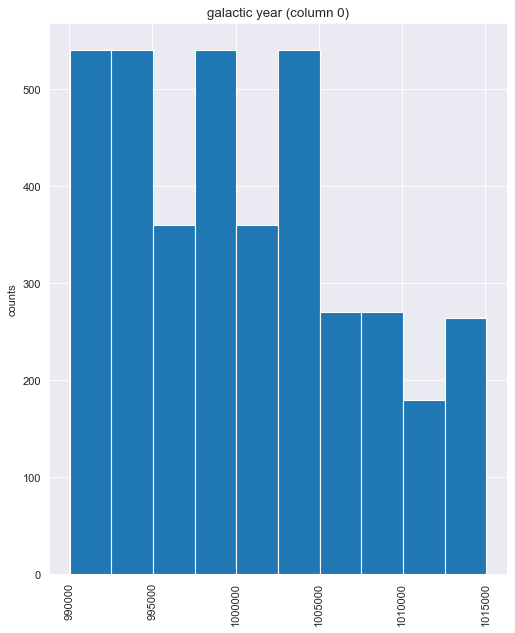

In [30]:
plotPerColumnDistribution(df1, 10, 5)

### 2.3 Correlation matrix:

In [ ]:
# plotCorrelationMatrix(df1, 19)

### 2.4 Scatter and density plots:

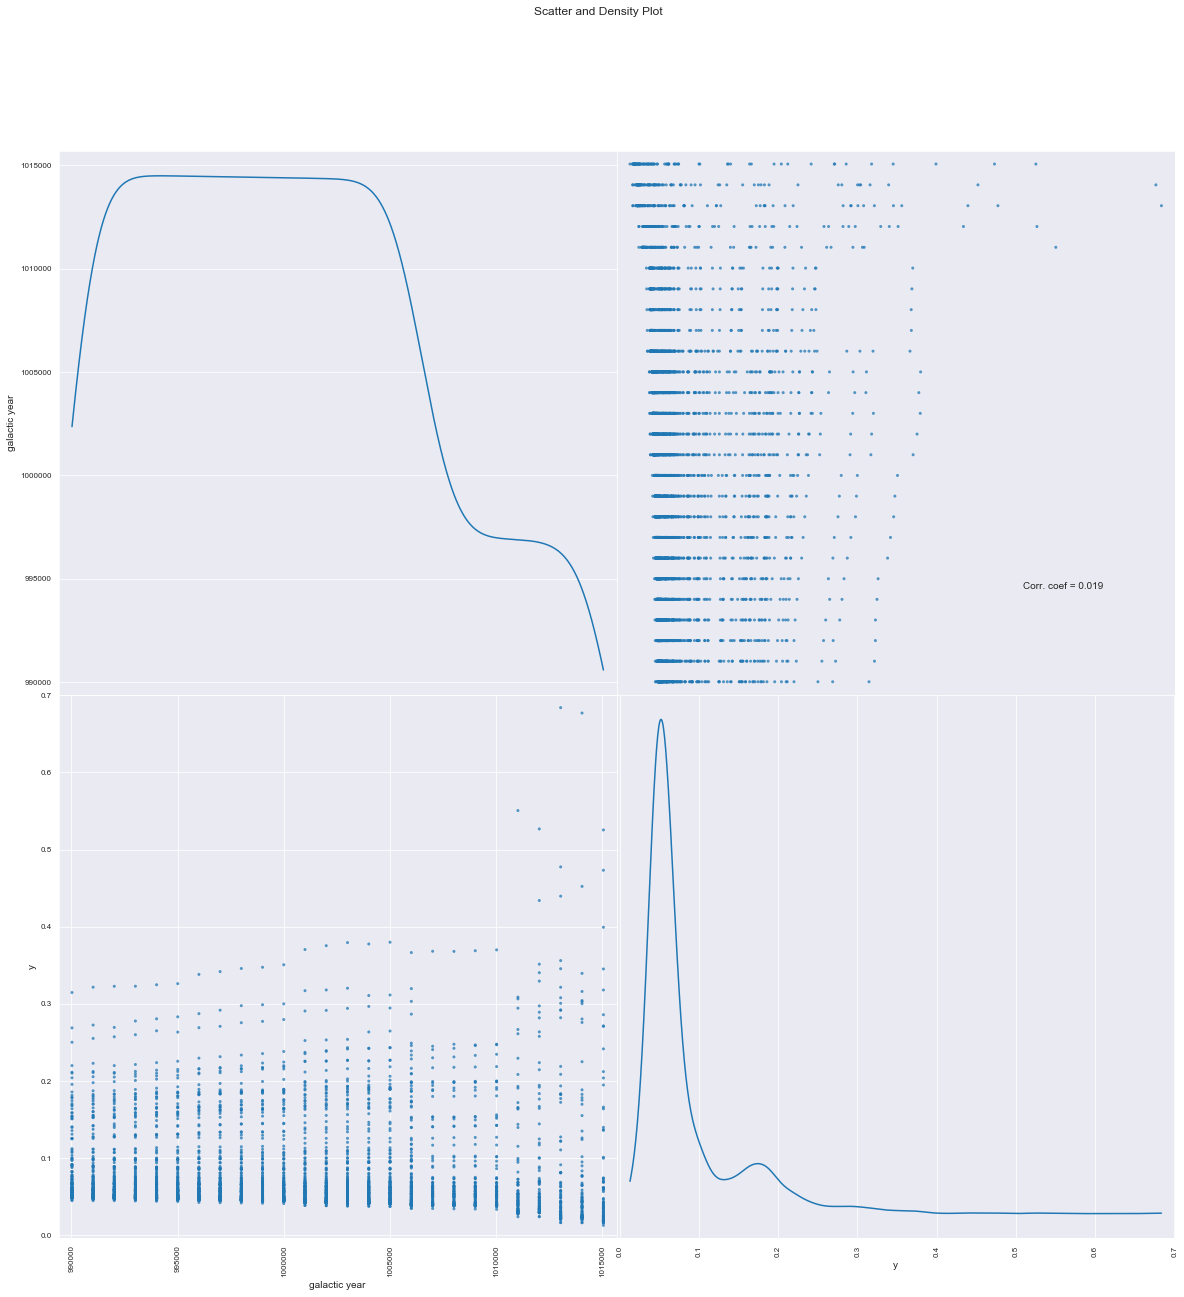

In [31]:
plotScatterMatrix(df1, 20, 10)

## 2.5 Checking For Linearity

#### a) Filter By Year

In [32]:
t1 = df_train1[df_train1.GYear.eq(990025)]
#t1 = trimmed_df.GYear.eq(990025)
t1.head()

,GYear,galaxy,EEI,EEIatBirth,GI_Per_Capita,Income Index,E_GYrs_of_Edu,Mean_GYrs_of_Ed,IDI,Education Index,...,Dev Index (IDI_F_Rank),Dev Index (IDI_M_Rank),Adj Net savings,Immuno Disease Prev (% ages 15-49),Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y,Index_Potential_Max,Likely Index Increase,Energy Allocation
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.052590,5.771153,3.330621,1.0
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868,5.661147,3.204859,92.0
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449,5.805954,3.370910,1.0
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394,5.823558,3.391383,1.0
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247,4.806384,2.310133,60.0


### Scatter Plot 1: Expectancy Vs Growth Index 

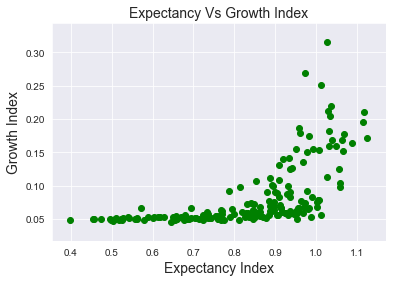

In [33]:
plt.scatter(t1['EEI'], t1['y'], color='green')
plt.title('Expectancy Vs Growth Index', fontsize=14)
plt.xlabel('Expectancy Index', fontsize=14)
plt.ylabel('Growth Index', fontsize=14)
plt.grid(True)
plt.show()

### Scatter Plot 2: Income Index Vs Growth Index

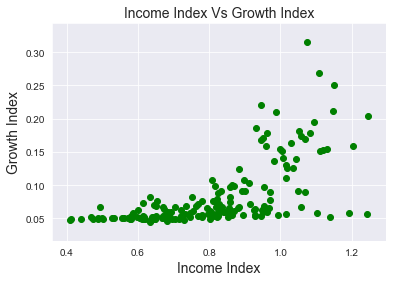

In [34]:
plt.scatter(t1['Income Index'], t1['y'], color='green')
plt.title('Income Index Vs Growth Index', fontsize=14)
plt.xlabel('Income Index', fontsize=14)
plt.ylabel('Growth Index', fontsize=14)
plt.grid(True)
plt.show()

### Scatter Plot 3: Gross Income per capita Vs Growth Index

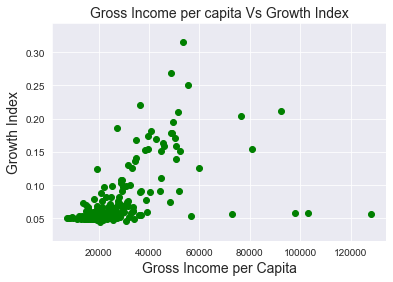

In [35]:
plt.scatter(t1['GI_Per_Capita'], t1['y'], color='green')
plt.title('Gross Income per capita Vs Growth Index', fontsize=14)
plt.xlabel('Gross Income per Capita', fontsize=14)
plt.ylabel('Growth Index', fontsize=14)
plt.grid(True)
plt.show()

#### b) Filter By Galaxy

In [36]:
t2 = df_train[df_train.galaxy.eq('Andromeda XI')]

#t2.head()

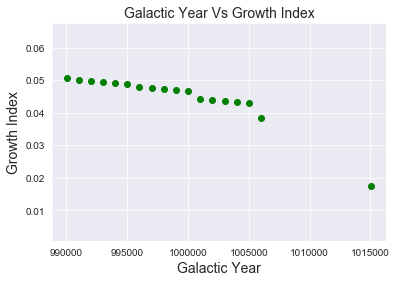

In [37]:
plt.scatter(t2['galactic year'], t2['y'], color='green')
plt.title('Galactic Year Vs Growth Index', fontsize=14)
plt.xlabel('Galactic Year', fontsize=14)
plt.ylabel('Growth Index', fontsize=14)
plt.grid(True)
plt.show()

### c) Inspect The Growth Index, y

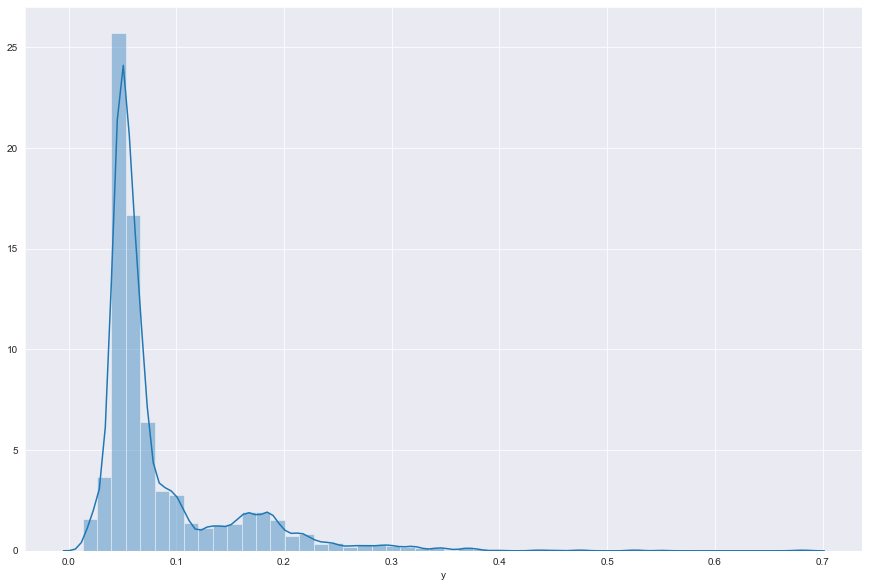

In [38]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df1['y'])

# 3. Baseline Model: Modelling with Trimmed Data (trimmed_df)


In [39]:
trimmed_df1.head()

,GYear,EEI,EEIatBirth,GI_Per_Capita,Income Index,E_GYrs_of_Edu,Mean_GYrs_of_Ed,IDI,Education Index,IDI_Rank,...,Dev Index (IDI_F_Rank),Dev Index (IDI_M_Rank),Adj Net savings,Immuno Disease Prev (% ages 15-49),Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y,Index_Potential_Max,Likely Index Increase,Energy Allocation
1806,1000000,0.689316,65.638091,15088.072865,0.886753,15.136626,12.777039,0.751931,0.848223,157.189161,...,114.110048,156.344873,9.792015,18.591266,30.336116,0.503575,0.050369,5.807276,3.372445,1.0
1814,1000000,0.690273,62.438111,22524.652152,0.520520,12.659825,7.604448,0.608262,0.577814,189.642778,...,174.950196,166.649398,21.369380,2.258941,20.659666,0.824864,0.047920,5.848695,3.420723,1.0
1817,1000000,1.055824,87.572474,35478.761084,0.889595,18.034259,12.481260,0.951648,0.967120,100.924078,...,90.403900,55.715254,19.438685,3.488755,28.197710,0.602528,0.085177,5.352019,2.864410,11.0
1824,1000000,1.061596,85.128977,21120.552199,0.679580,15.279956,13.228658,0.779531,0.950648,123.076566,...,160.459662,145.505845,4.419405,2.969704,15.128145,0.659367,0.081248,5.394172,2.909709,16.0
1826,1000000,0.691074,65.679071,20590.608266,0.545087,9.581990,6.505547,0.580999,0.432198,178.118196,...,146.877670,161.677601,18.719322,7.723378,40.966939,0.764898,0.045985,5.882665,3.460575,1.0


In [40]:
X_columns = trimmed_df1.columns.tolist()[0:78]
y_columns = trimmed_df1.columns.tolist()[-4:-3]
#print(f'All columns: {trimmed_df1.columns.tolist()}')
print()
print(f'X values: {X_columns}')
print()
print(f'y values: {y_columns}')


X values: ['GYear', 'EEI', 'EEIatBirth', 'GI_Per_Capita', 'Income Index', 'E_GYrs_of_Edu', 'Mean_GYrs_of_Ed', 'IDI', 'Education Index', 'IDI_Rank', '%Pop_with_dwater', '%Pop_basic_sanit', 'GCF_%_of_GDP', 'Pop_in_Millions', '%Urban_Pop', 'Mort_Rate_lt_5_per1K', 'Mort_Rate_infant_per1K', 'Old_Age_Dep', 'Adult_Pop_in_Mln', 'Pop_gt_65_in_Millions', 'Life_Exp_at_Birth_M', 'Life_Exp_at_Birth_F', 'Pop_lt_5(millions)', 'Young_Age_Dep(0-14)', 'Adolesc_Birth_Rate(per1000females)', 'Tot_Unemployment_Rate(F:M_Ratio)', 'Vulnerable_Emp(%_of_Tot_Emp)', 'Total Unemployment(% of labour force)', 'Emp_Agri(%Tot)', 'Labour_Force%_Participation', 'Labour_Force%_Participation_F', 'Emp_Services(%Tot)', 'Labour_Force%_Participation_M', '%Empl_Ratio', 'Jungle(%_of_Tot_Land_Area)', '%Female_Emp_NonAgri', 'Youth_UnEmpl_Ratio(F:M)', '%UnEmpl_Youth(15-24)', 'Mort_Rate_Adult_F_per1000', 'Mort_Rate_Adult_M_per1000', '%Infant_No_IMUN(Red_Hot_Dis)', '%Infant_No_Comb_Vaccine', 'per-capita_GGP', 'total Gross Gal_produc

In [41]:
X = trimmed_df1[X_columns].values 
y = trimmed_df1[y_columns].values[:, 0]

In [42]:
X.shape

(334, 78)

In [43]:
y.shape

(334,)

In [ ]:
# print("Shape of training data: {}".format(np.shape(xtrain)))

In [44]:
train_X, test_X, train_y, test_y = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, shuffle=True)

In [45]:
train_X.shape

(233, 78)

In [46]:
train_y.shape

(233,)

### 3.1 Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

# define the model
rf = RandomForestRegressor()
# fit the model
rf.fit(train_X, train_y)
# get importance
importance = rf.feature_importances_
importance[::-1].sort() # np.sort(temp)[::-1] Creates new array
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.25067
Feature: 1, Score: 0.23074
Feature: 2, Score: 0.07799
Feature: 3, Score: 0.07775
Feature: 4, Score: 0.06281
Feature: 5, Score: 0.04625
Feature: 6, Score: 0.03697
Feature: 7, Score: 0.02953
Feature: 8, Score: 0.02641
Feature: 9, Score: 0.02061
Feature: 10, Score: 0.01395
Feature: 11, Score: 0.01003
Feature: 12, Score: 0.01001
Feature: 13, Score: 0.00980
Feature: 14, Score: 0.00938
Feature: 15, Score: 0.00853
Feature: 16, Score: 0.00507
Feature: 17, Score: 0.00340
Feature: 18, Score: 0.00328
Feature: 19, Score: 0.00276
Feature: 20, Score: 0.00274
Feature: 21, Score: 0.00253
Feature: 22, Score: 0.00233
Feature: 23, Score: 0.00233
Feature: 24, Score: 0.00230
Feature: 25, Score: 0.00230
Feature: 26, Score: 0.00229
Feature: 27, Score: 0.00226
Feature: 28, Score: 0.00207
Feature: 29, Score: 0.00192
Feature: 30, Score: 0.00173
Feature: 31, Score: 0.00172
Feature: 32, Score: 0.00170
Feature: 33, Score: 0.00164
Feature: 34, Score: 0.00160
Feature: 35, Score: 0.00155
Fe

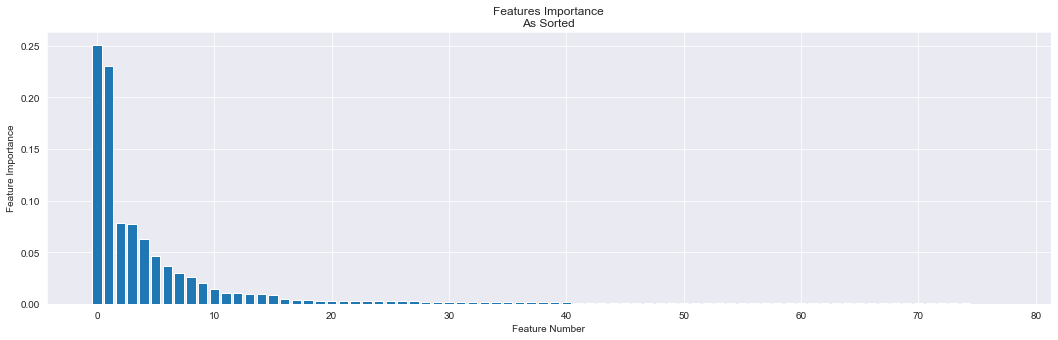

In [48]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (18,5)

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature Number')
plt.ylabel('Feature Importance')
plt.title('Features Importance\nAs Sorted')
plt.show()

In [52]:
y_pred_ts = rf.predict(test_X)
#y_pred_dt=rf.predict(test)

#submission['Purchase'] = y_pred_dt
#submission.to_csv('dtr_model3.csv',index=False)

##### Actual Vs Predicted Values

In [53]:
results_df = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred_ts})
results_df.head()

,Actual,Predicted
0,0.345569,0.296195
1,0.043012,0.051447
2,0.067168,0.070609
3,0.027596,0.048138
4,0.056742,0.055297


##### Evaluate Model

In [54]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred_ts))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred_ts))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred_ts)))

Mean Absolute Error: 0.015201647317852543
Mean Squared Error: 0.0006785732901227063
Root Mean Squared Error: 0.026049439343730725


In [56]:
# The closer towards 1, the better the fit
test_set_r2 = r2_score(test_y, y_pred_ts)

print("R2 Score:", test_set_r2)

R2 Score: 0.8886671719185111


In [57]:
#feature_important = rf.score(importance_type='gain')
#keys = list(feature_important.keys())

for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
    keys = i

#values = list(feature_important.values())
values = [x for x in importance if x > 0.00202]
#total = sum(values)
ans = sum(importance)
new = [value * 100. / ans for value in values]
new = np.round(new,2)

feature_importances = pd.DataFrame()
feature_importances['Features'] = keys
feature_importances['Importance (%)'] = new
feature_importances = feature_importances.sort_values(['Importance (%)'],ascending=False).reset_index(drop=True)
feature_importances
feature_importances.style.set_properties(**{'font-size':'10pt'})

,Features,Importance (%)
0,nan,25.07
1,nan,23.07
2,nan,7.8
3,nan,7.78
4,nan,6.28
5,nan,4.62
6,nan,3.7
7,nan,2.95
8,nan,2.64
9,nan,2.06


## 3.2 Advanced Linear Regression With statsmodels

### Using The Stats Package statsmodels.api:

You can implement linear regression in Python relatively easily by using the package statsmodels as well. Typically, this is desirable when there is a need for more detailed results.

 

In [58]:
import numpy as np
import statsmodels.api as sm

In [ ]:
# This adds a column of ones if the intercept, b-naught is required
#x = sm.add_constant(X)

By calling .fit(), you obtain the variable results, which is an instance of the class statsmodels.regression.linear_model.RegressionResultsWrapper. This object holds a lot of information about the regression model.

In [59]:
model_st = sm.OLS(y, X)
results = model_st.fit()

In [60]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              69.16
Date:                Tue, 23 Jun 2020   Prob (F-statistic):                   7.51e-136
Time:                        13:22:42   Log-Likelihood:                          730.00
No. Observations:                 334   AIC:                                     -1304.
Df Residuals:                     256   BIC:                                     -1007.
Df Model:                          78                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [62]:
from statsmodels.tools.eval_measures import rmse

# fit your model which you have already done

# now generate predictions
ystat_pred = model_st.predict(results.params, X)

# calc rmse
rmse = rmse(y, ystat_pred)

print("RMSE Score from StatsmodelAPI:", rmse)

RMSE Score from StatsmodelAPI: 0.027199257558299005


### 3.4 Baseline Results with Gradient Boosting Regressor?

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [64]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.2, random_state=13)

In [65]:
# Initial Starting Parameters
params = {'n_estimators': 1000,
          'max_depth': 45,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [66]:
# model= GradientBoostingRegressor()

reg_gb = GradientBoostingRegressor(**params)
reg_gb.fit(X1_train, y1_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls',
                          max_depth=45, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [67]:
reg_gb.score(X1_test, y1_test)

0.8666883702611425

In [68]:
y_pred_gb = reg_gb.predict(X1_test)

In [69]:
mse = mean_squared_error(y1_test, reg_gb.predict(X1_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

print('R2 score: {:.2f}'.format(r2_score(y1_test, y_pred_gb)))

The mean squared error (MSE) on test set: 0.0011
R2 score: 0.87


In [70]:
rmse_test_gb = np.sqrt(mean_squared_error(y_pred_gb, y1_test))
rmse_test_gb

0.03365841585780872

# 4. Feature Engineering

### Modeling Features Using Gradient Boosting Regressor

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01,
                                max_depth = 5, random_state=0, loss='ls').fit(train_X, train_y)
mean_squared_error(test_y, est.predict(test_X))

0.0009781370396119392

In [81]:
gbtrain_pred_y = est.predict(train_X)
gbtest_pred_y = est.predict(test_X)

In [82]:
grmse_train = np.sqrt(mean_squared_error(gbtrain_pred_y, train_y))

# msle_train = mean_squared_log_error(train_pred_y, train_y)
grmse_test = np.sqrt(mean_squared_error(gbtest_pred_y, test_y))

In [83]:
# Note that for rmse, the lower that value is, the better the fit
print('gbrmse_train:',grmse_train)
print('gbrmse_test:',grmse_test)

gbrmse_train: 0.0003161810175048605
gbrmse_test: 0.031275182487268384


### Features Selection

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [76]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

params = {'n_estimators': 1000,
          'max_depth': 5,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

#### Fit The Regression

In [77]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X2_train, y2_train)

mse = mean_squared_error(y2_test, reg.predict(X2_test))
print("The mean squared error (MSE) on test set: {:.5f}".format(mse))

The mean squared error (MSE) on test set: 0.00099


#### Plot training deviance

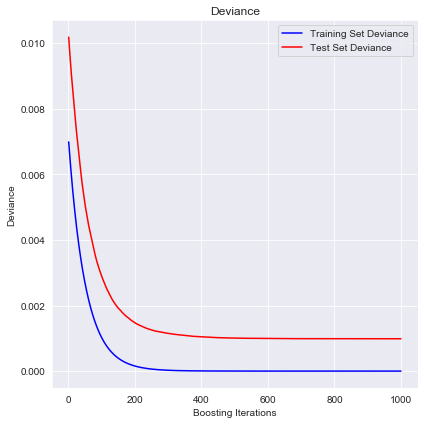

In [78]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y2_pred in enumerate(reg.staged_predict(X2_test)):
    test_score[i] = reg.loss_(y2_test, y2_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

#### Plot Feature Importance

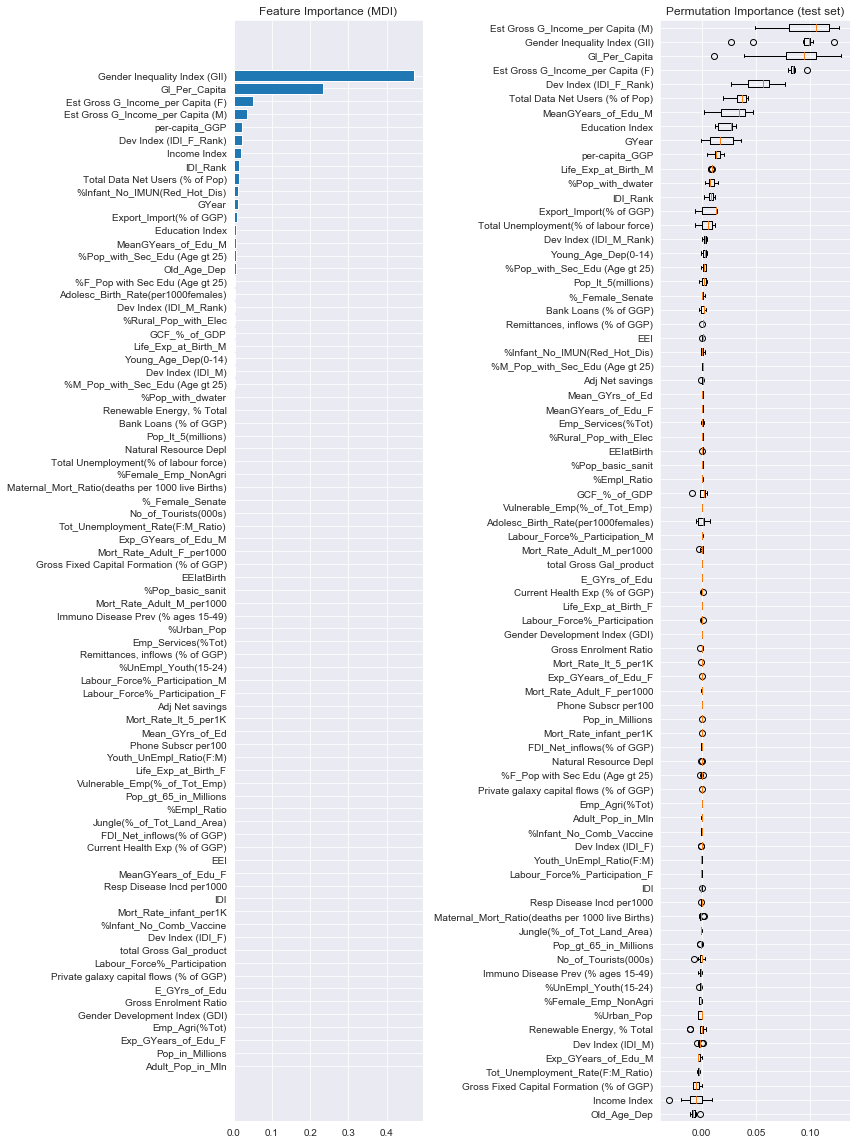

In [79]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 16))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X2_test, y2_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X_columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [84]:
# New Dataset with Features with most Importance

new_df_train1 = df_train1.filter(['galaxy',
                                  'GYear',
                                  'Gender Inequality Index (GII)',
                                  'GI_Per_Capita',
                                  'per-capita_GGP',
                                  'Est Gross G_Income_per Capita (M)',
                                  'Est Gross G_Income_per Capita (F)',
                                  'Total Data Net Users (% of Pop)',
                                  'IDI_Rank',
                                  'Income Index',
                                  'Dev Index (IDI_F)',
                                  'Dev Index (IDI_M)',                        
                                  'Old_Age_Dep',
                                  '%Pop_with_Sec_Edu (Age gt 25)',
                                  'Education Index',
                                  '%Rural_Pop_with_Elec',
                                  '%Infant_No_IMUN(Red_Hot_Dis)',
                                  '%_Female_Senate',
                                  'Dev Index (IDI_M_Rank)',
                                  'Bank Loans (% of GGP)',
                                  '%Pop_with_dwater',
                                  'Index_Potential_Max',
                                  'Likely Index Increase',
                                  'Energy Allocation',
                                  'y'], axis=1)
new_df_train1.head()

,galaxy,GYear,Gender Inequality Index (GII),GI_Per_Capita,per-capita_GGP,Est Gross G_Income_per Capita (M),Est Gross G_Income_per Capita (F),Total Data Net Users (% of Pop),IDI_Rank,Income Index,...,%Rural_Pop_with_Elec,%Infant_No_IMUN(Red_Hot_Dis),%_Female_Senate,Dev Index (IDI_M_Rank),Bank Loans (% of GGP),%Pop_with_dwater,Index_Potential_Max,Likely Index Increase,Energy Allocation,y
0,Large Magellanic Cloud (LMC),990025,NaN,27109.234310,21158.324865,NaN,NaN,NaN,NaN,0.646039,...,NaN,16.167871,NaN,NaN,75.604799,NaN,5.771153,3.330621,1.0,0.052590
1,Camelopardalis B,990025,NaN,30166.793958,24984.044391,NaN,NaN,NaN,152.522198,0.852246,...,NaN,36.639519,NaN,NaN,57.214150,NaN,5.661147,3.204859,92.0,0.059868
2,Virgo I,990025,NaN,8441.707353,19860.121520,NaN,NaN,NaN,209.813266,0.499762,...,NaN,31.958515,NaN,NaN,76.141735,NaN,5.805954,3.370910,1.0,0.050449
3,UGC 8651 (DDO 181),990025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.823558,3.391383,1.0,0.049394
4,Tucana Dwarf,990025,NaN,81033.956906,75156.049406,NaN,NaN,NaN,71.885345,1.131163,...,134.967049,29.577375,NaN,NaN,NaN,NaN,4.806384,2.310133,60.0,0.154247


In [85]:
# New Test Dataset (df_test1) with Features with most Importance 

new_df_test1 = df_test1.filter(['galaxy',
                                  'GYear',
                                  'Gender Inequality Index (GII)',
                                  'GI_Per_Capita',
                                  'per-capita_GGP',
                                  'Est Gross G_Income_per Capita (M)',
                                  'Est Gross G_Income_per Capita (F)',
                                  'Total Data Net Users (% of Pop)',
                                  'IDI_Rank',
                                  'Income Index',
                                  'Dev Index (IDI_F)',
                                  'Dev Index (IDI_M)',                        
                                  'Old_Age_Dep',
                                  '%Pop_with_Sec_Edu (Age gt 25)',
                                  'Education Index',
                                  '%Rural_Pop_with_Elec',
                                  '%Infant_No_IMUN(Red_Hot_Dis)',
                                  '%_Female_Senate',
                                  'Dev Index (IDI_M_Rank)',
                                  'Bank Loans (% of GGP)',
                                  '%Pop_with_dwater',
                                  'Index_Potential_Max',
                                  'Likely Index Increase',
                                  'Energy Allocation'
                                  ], axis=1)
new_df_test1.head()

,galaxy,GYear,Gender Inequality Index (GII),GI_Per_Capita,per-capita_GGP,Est Gross G_Income_per Capita (M),Est Gross G_Income_per Capita (F),Total Data Net Users (% of Pop),IDI_Rank,Income Index,...,Dev Index (IDI_M),Old_Age_Dep,%Pop_with_Sec_Edu (Age gt 25),Education Index,%Rural_Pop_with_Elec,%Infant_No_IMUN(Red_Hot_Dis),%_Female_Senate,Dev Index (IDI_M_Rank),Bank Loans (% of GGP),%Pop_with_dwater
0,KK98 77,1007012,NaN,12236.576447,NaN,NaN,NaN,NaN,232.621842,0.593325,...,NaN,NaN,NaN,0.556267,NaN,NaN,NaN,NaN,NaN,105.193088
1,Reticulum III,1007012,NaN,3431.883825,NaN,NaN,NaN,NaN,247.580771,0.675407,...,NaN,NaN,NaN,0.409969,NaN,NaN,NaN,NaN,NaN,55.730638
2,Reticulum III,1008016,NaN,27562.914252,NaN,NaN,NaN,NaN,249.798771,0.594624,...,NaN,NaN,NaN,0.486167,NaN,NaN,NaN,NaN,NaN,58.755900
3,Segue 1,1007012,NaN,20352.232905,NaN,NaN,NaN,NaN,211.505060,0.837700,...,NaN,NaN,NaN,0.523441,NaN,NaN,NaN,NaN,NaN,70.176431
4,Virgo I,1013042,NaN,23959.704016,28890.168075,21309.50697,18103.974021,41.585873,234.721069,0.520579,...,0.600445,14.013421,42.980727,0.580418,50.233592,92.815852,NaN,224.104054,86.296925,69.768692


In [86]:
new_df_train1.shape

(3865, 25)

#### Filling NAs with Group Feature Mean

In [87]:
new_df_train1[['GYear',
               'Gender Inequality Index (GII)',
               'GI_Per_Capita',
               'per-capita_GGP',
               'Est Gross G_Income_per Capita (M)',
               'Est Gross G_Income_per Capita (F)',
               'Total Data Net Users (% of Pop)',
               'IDI_Rank',
               'Income Index',
               'Dev Index (IDI_F)',
               'Dev Index (IDI_M)',                        
               'Old_Age_Dep',
               '%Pop_with_Sec_Edu (Age gt 25)',
               'Education Index',
               '%Rural_Pop_with_Elec',
               '%Infant_No_IMUN(Red_Hot_Dis)',
               '%_Female_Senate',
               'Dev Index (IDI_M_Rank)',
               'Bank Loans (% of GGP)',
               '%Pop_with_dwater',
               'Index_Potential_Max',
               'Likely Index Increase',
               'Energy Allocation',
               'y']] = new_df_train1.groupby(['galaxy'])['GYear',
                                  'Gender Inequality Index (GII)',
                                  'GI_Per_Capita',
                                  'per-capita_GGP',
                                  'Est Gross G_Income_per Capita (M)',
                                  'Est Gross G_Income_per Capita (F)',
                                  'Total Data Net Users (% of Pop)',
                                  'IDI_Rank',
                                  'Income Index',
                                  'Dev Index (IDI_F)',
                                  'Dev Index (IDI_M)',                        
                                  'Old_Age_Dep',
                                  '%Pop_with_Sec_Edu (Age gt 25)',
                                  'Education Index',
                                  '%Rural_Pop_with_Elec',
                                  '%Infant_No_IMUN(Red_Hot_Dis)',
                                  '%_Female_Senate',
                                  'Dev Index (IDI_M_Rank)',
                                  'Bank Loans (% of GGP)',
                                  '%Pop_with_dwater',
                                  'Index_Potential_Max',
                                  'Likely Index Increase',
                                  'Energy Allocation',
                                  'y']\
    .transform(lambda x: x.fillna(x.mean()))

In [88]:
new_df_test1[['GYear',
               'Gender Inequality Index (GII)',
               'GI_Per_Capita',
               'per-capita_GGP',
               'Est Gross G_Income_per Capita (M)',
               'Est Gross G_Income_per Capita (F)',
               'Total Data Net Users (% of Pop)',
               'IDI_Rank',
               'Income Index',
               'Dev Index (IDI_F)',
               'Dev Index (IDI_M)',                        
               'Old_Age_Dep',
               '%Pop_with_Sec_Edu (Age gt 25)',
               'Education Index',
               '%Rural_Pop_with_Elec',
               '%Infant_No_IMUN(Red_Hot_Dis)',
               '%_Female_Senate',
               'Dev Index (IDI_M_Rank)',
               'Bank Loans (% of GGP)',
               '%Pop_with_dwater'
               #'Index_Potential_Max',
               #'Likely Index Increase',
               #'Energy Allocation',
               #'y'
             ]] = new_df_test1.groupby(['galaxy'])['GYear',
                                  'Gender Inequality Index (GII)',
                                  'GI_Per_Capita',
                                  'per-capita_GGP',
                                  'Est Gross G_Income_per Capita (M)',
                                  'Est Gross G_Income_per Capita (F)',
                                  'Total Data Net Users (% of Pop)',
                                  'IDI_Rank',
                                  'Income Index',
                                  'Dev Index (IDI_F)',
                                  'Dev Index (IDI_M)',                        
                                  'Old_Age_Dep',
                                  '%Pop_with_Sec_Edu (Age gt 25)',
                                  'Education Index',
                                  '%Rural_Pop_with_Elec',
                                  '%Infant_No_IMUN(Red_Hot_Dis)',
                                  '%_Female_Senate',
                                  'Dev Index (IDI_M_Rank)',
                                  'Bank Loans (% of GGP)',
                                  '%Pop_with_dwater'
                                  #'Index_Potential_Max',
                                  #'Likely Index Increase',
                                  #'Energy Allocation',
                                  #'y'
                                                       ]\
    .transform(lambda x: x.fillna(x.mean()))

#### Dropping All Remaining NAs

In [ ]:
#print(new_df_train1.isnull().sum())

In [89]:
new_df_train2 = new_df_train1.dropna()
new_df_test2 = new_df_test1.dropna()

In [90]:
print(new_df_train2.isnull().sum())

galaxy                               0
GYear                                0
Gender Inequality Index (GII)        0
GI_Per_Capita                        0
per-capita_GGP                       0
Est Gross G_Income_per Capita (M)    0
Est Gross G_Income_per Capita (F)    0
Total Data Net Users (% of Pop)      0
IDI_Rank                             0
Income Index                         0
Dev Index (IDI_F)                    0
Dev Index (IDI_M)                    0
Old_Age_Dep                          0
%Pop_with_Sec_Edu (Age gt 25)        0
Education Index                      0
%Rural_Pop_with_Elec                 0
%Infant_No_IMUN(Red_Hot_Dis)         0
%_Female_Senate                      0
Dev Index (IDI_M_Rank)               0
Bank Loans (% of GGP)                0
%Pop_with_dwater                     0
Index_Potential_Max                  0
Likely Index Increase                0
Energy Allocation                    0
y                                    0
dtype: int64


In [91]:
new_df_train2.shape

(3240, 25)

### Correlation Data

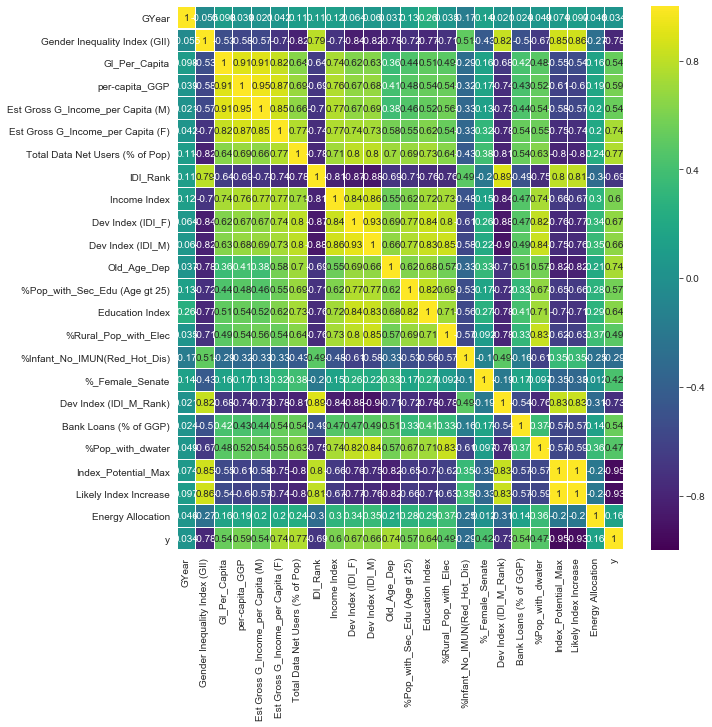

In [92]:
df_kor = new_df_train2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [ ]:
sns.pairplot(new_df_train2)

### Handling Multicollinearity

In [144]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#df_sel = new_df_train2.drop(['GYear','galaxy'],axis=1)
df_sel = trimmed_df1.drop(['GYear'],axis=1)

df_sel_data = df_sel.iloc[:,:-1]
df_sel_target = df_sel.iloc[:,-1:]
df_sel_data.head()
#df_sel_target.head()


,EEI,EEIatBirth,GI_Per_Capita,Income Index,E_GYrs_of_Edu,Mean_GYrs_of_Ed,IDI,Education Index,IDI_Rank,%Pop_with_dwater,...,Gender Development Index (GDI),Dev Index (IDI_F_Rank),Dev Index (IDI_M_Rank),Adj Net savings,Immuno Disease Prev (% ages 15-49),Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y,Index_Potential_Max,Likely Index Increase
1806,0.689316,65.638091,15088.072865,0.886753,15.136626,12.777039,0.751931,0.848223,157.189161,110.010529,...,0.996141,114.110048,156.344873,9.792015,18.591266,30.336116,0.503575,0.050369,5.807276,3.372445
1814,0.690273,62.438111,22524.652152,0.520520,12.659825,7.604448,0.608262,0.577814,189.642778,63.094446,...,0.900665,174.950196,166.649398,21.369380,2.258941,20.659666,0.824864,0.047920,5.848695,3.420723
1817,1.055824,87.572474,35478.761084,0.889595,18.034259,12.481260,0.951648,0.967120,100.924078,108.922466,...,1.006970,90.403900,55.715254,19.438685,3.488755,28.197710,0.602528,0.085177,5.352019,2.864410
1824,1.061596,85.128977,21120.552199,0.679580,15.279956,13.228658,0.779531,0.950648,123.076566,123.088027,...,1.059593,160.459662,145.505845,4.419405,2.969704,15.128145,0.659367,0.081248,5.394172,2.909709
1826,0.691074,65.679071,20590.608266,0.545087,9.581990,6.505547,0.580999,0.432198,178.118196,81.211784,...,0.813624,146.877670,161.677601,18.719322,7.723378,40.966939,0.764898,0.045985,5.882665,3.460575


In [145]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [146]:
calc_vif(df_sel_data)

,variables,VIF
0,EEI,346.414298
1,EEIatBirth,748.285152
2,GI_Per_Capita,43.596254
3,Income Index,191.654381
4,E_GYrs_of_Edu,237.276579
5,Mean_GYrs_of_Ed,133.416695
6,IDI,288.008647
7,Education Index,204.816864
8,IDI_Rank,78.883161
9,%Pop_with_dwater,220.650333


In [164]:
df_sel2 = df_sel_data.drop(['Est Gross G_Income_per Capita (F)', 
                            'Index_Potential_Max','Dev Index (IDI_F)',
                            'Likely Index Increase', 'Emp_Services(%Tot)',
                           'Gender Development Index (GDI)','Dev Index (IDI_M)',
                           'Labour_Force%_Participation',
                           'Life_Exp_at_Birth_M','Life_Exp_at_Birth_F',
                           '%M_Pop_with_Sec_Edu (Age gt 25)','EEIatBirth',
                           'E_GYrs_of_Edu','Mean_GYrs_of_Ed','MeanGYears_of_Edu_F',
                           'MeanGYears_of_Edu_M','MeanGYears_of_Edu_M',
                           'Exp_GYears_of_Edu_F','Exp_GYears_of_Edu_M',
                           'Labour_Force%_Participation_M','Old_Age_Dep',
                           'Labour_Force%_Participation_M','%Empl_Ratio',
                           '%Pop_with_dwater','Mort_Rate_infant_per1K',
                           'Tot_Unemployment_Rate(F:M_Ratio)','IDI',
                           'Maternal_Mort_Ratio(deaths per 1000 live Births)',
                           'Labour_Force%_Participation_F','Gross Enrolment Ratio',
                           'Vulnerable_Emp(%_of_Tot_Emp)','Adolesc_Birth_Rate(per1000females)',
                           'Dev Index (IDI_F_Rank)','Dev Index (IDI_M_Rank)',
                           '%F_Pop with Sec Edu (Age gt 25)','Young_Age_Dep(0-14)',
                           'Pop_lt_5(millions)','Pop_gt_65_in_Millions',
                           'Est Gross G_Income_per Capita (M)','Youth_UnEmpl_Ratio(F:M)',
                           '%UnEmpl_Youth(15-24)','Mort_Rate_Adult_F_per1000',
                           'Total Data Net Users (% of Pop)','%Rural_Pop_with_Elec',
                           '%Infant_No_IMUN(Red_Hot_Dis)','%Female_Emp_NonAgri',
                           '%Pop_with_Sec_Edu (Age gt 25)','Income Index',
                           'IDI_Rank','GCF_%_of_GDP','per-capita_GGP','Mort_Rate_lt_5_per1K',
                           'Gross Fixed Capital Formation (% of GGP)','Gender Inequality Index (GII)',
                           'Mort_Rate_Adult_M_per1000','y','Current Health Exp (% of GGP)',
                           'Export_Import(% of GGP)','%Pop_basic_sanit','Education Index',
                           '%Urban_Pop'],axis=1)
calc_vif(df_sel2)

,variables,VIF
0,EEI,76.303207
1,GI_Per_Capita,15.580399
2,Pop_in_Millions,10.515901
3,Adult_Pop_in_Mln,11.161920
4,Total Unemployment(% of labour force),11.678645
5,Emp_Agri(%Tot),17.242596
6,Jungle(%_of_Tot_Land_Area),10.055939
7,%Infant_No_Comb_Vaccine,6.422335
8,total Gross Gal_product,10.370478
9,FDI_Net_inflows(% of GGP),6.707708


In [ ]:
df2 = df_sel2.copy()
df2['Age_at_joining'] = df.apply(lambda x: x['Age'] - x['Years of service'],axis=1)
X = df2.drop(['Age','Years of service','Salary'],axis=1)
calc_vif(X)

In [126]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing

In [ ]:
df_sel_1 = new_df_train2.drop(['GYear','galaxy'],axis=1)
df_sel_1.shape

In [ ]:
test_columns = df_sel_1.columns.tolist()[0:22]

dtest = df_sel_1[test_columns].values 

### Sorting Data & Re-Indexing

In [ ]:
# new_df_test2.set_index(['galaxy', 'GYear'])
# new_df_train2.set_index(['galaxy', 'GYear'])

### Outlier Identification & Removal

In [ ]:
new_df_train2.describe()

In [ ]:
new_df_test2.describe()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

#### By Visualization

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['Income'], df['Loan_amount'])
ax.set_xlabel('Income of applicants in USD')
ax.set_ylabel('Loan amount applied for in USD')
plt.show()

#### Identifying Outliers with Skewness

Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values

In [ ]:
print(df['Income'].skew())
df['Income'].describe()

### Outlier Treatment

#### Quantile-based Flooring and Capping

In [ ]:
print(df['Income'].quantile(0.10))
print(df['Income'].quantile(0.90))

In [ ]:
df["Income"] = np.where(df["Income"] <2960.0, 2960.0,df['Income'])
df["Income"] = np.where(df["Income"] >12681.0, 12681.0,df['Income'])
print(df['Income'].skew())

#### Trimming

In [ ]:
index = df[(df['Age'] >= 100)|(df['Age'] <= 18)].index
df.drop(index, inplace=True)
df['Age'].describe()

#### IQR Score

In [ ]:
df_out = new_df_test2[~((new_df_test2 < (Q1 - 1.5 * IQR)) |(new_df_test2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

In [ ]:
df_out = new_df_train2[~((new_df_train2 < (Q1 - 1.5 * IQR)) |(new_df_train2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

#### Log Transformation

In [ ]:
df["Log_Loanamt"] = df["Loan_amount"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df['Loan_amount'].skew())
print(df['Log_Loanamt'].skew())

#### Replacing Outliers with Median Values

In [ ]:
# Extracting Values to be used to replace outliers
print(df['Loan_amount'].quantile(0.50)) 
print(df['Loan_amount'].quantile(0.95)) 

In [ ]:
# All values above 95% Quantile replaced with mean
df['Loan_amount'] = np.where(df['Loan_amount'] > 325, 140, df['Loan_amount'])
df.describe()

### Test Dataset: Final Cleaning

In [ ]:
new_df_test2.shape

In [ ]:
new_df_test2.head()

In [ ]:
test_columns = new_df_test2.columns.tolist()[0:22]
#y_columns2 = new_df_test2.columns.tolist()[-1]
#print(f'All columns: {new_df_train2.columns.tolist()}')
print()
print(f'X values: {test_columns}')

In [ ]:
dtest = new_df_test2[test_columns].values 

In [ ]:
dtest.shape

In [ ]:
# dropping passed columns 
new_df_test3 = new_df_test2.drop(["galaxy"], axis = 1)
new_df_test3.shape

###### Label Encoding Galaxy Category

In [ ]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis
print(dtest[:8,1], '... will now become: ')
from sklearn.preprocessing import LabelEncoder
label_test_galactic_encoder = LabelEncoder()
dtest[:,1] = label_test_galactic_encoder.fit_transform(dtest[:,1])
print(dtest[:8,1])

In [ ]:
dtest.shape

###### Feature Scaling & Data Normalization

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

dtest_minmax = min_max_scaler.fit_transform(dtest)
dtest_minmax

In [ ]:
dtest_minmax.shape

### Training Dataset: Split Data 

In [ ]:
new_df_train2.shape

In [ ]:
X_columns2 = new_df_train2.columns.tolist()[0:22]
y_columns2 = new_df_train2.columns.tolist()[-1]
#print(f'All columns: {new_df_train2.columns.tolist()}')
print()
print(f'X values: {X_columns2}')
print()
print(f'y values: {y_columns2}')

In [ ]:
X2 = new_df_train2[X_columns2].values 
y2 = new_df_train2[y_columns2].values

In [ ]:
X2.shape

In [ ]:
y2.shape

###### Label Encoding Galaxy Category

In [ ]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis
print(X2[:8,1], '... will now become: ')
from sklearn.preprocessing import LabelEncoder
label_X2_galactic_encoder = LabelEncoder()
X2[:,1] = label_X2_galactic_encoder.fit_transform(X2[:,1])
print(X2[:8,1])

In [ ]:
X2.shape

###### Feature Scaling & Data Normalization

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X2_minmax = min_max_scaler.fit_transform(X2)
X2_minmax

In [ ]:
X2_minmax.shape

In [ ]:
y2.shape

In [ ]:
y2 = y2.reshape(-1,1)

In [ ]:
y2.shape

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                     y, test_size=0.1, random_state=13)

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X2_minmax, 
                                                        y2, 
                                                        test_size=0.2, random_state=13)

In [ ]:
X3_train.shape

In [ ]:
y3_train.shape

# 5. Modelling with Transformed Data

### 5.1 Multiple Linear Regression

### 5.2 Ensemble with Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.svm import SVR

final_layer = StackingRegressor(
    estimators=[('rf', RandomForestRegressor(random_state=42)),
                ('gbrt', GradientBoostingRegressor(random_state=42))],
    final_estimator=RidgeCV()
    )
multi_layer_regressor = StackingRegressor(
    estimators=[('ridge', RidgeCV()),
                ('lasso', LassoCV(random_state=42)),
                ('svr', SVR(C=1, gamma=1e-6, kernel='rbf'))],
    final_estimator=final_layer
)
multi_layer_regressor.fit(X3_train, y3_train)

print('R2 score: {:.2f}'
      .format(multi_layer_regressor.score(X3_test, y3_test)))

In [ ]:
test_pred_ml = multi_layer_regressor.predict(X3_test)
from sklearn.metrics import r2_score
print('R2 score: {:.2f}'.format(r2_score(y3_test, test_pred_ml)))

In [ ]:
train_pred_ml = multi_layer_regressor.predict(X3_train)

print(np.sqrt(mean_squared_error(y3_train, train_pred_ml)))
print(r2_score(y3_train, train_pred_ml))

# test_pred_ml = multi_layer_regressor.predict(X3_test)
#from sklearn.metrics import r2_score
#print('R2 score: {:.2f}'.format(r2_score(y3_test, test_pred_ml)))
print()
print(np.sqrt(mean_squared_error(y3_test,test_pred_ml))) 
print(r2_score(y3_test,test_pred_ml))


## 5.3 Using Deep Neural Network

#### Drop Galaxy Column

In [ ]:
# dropping passed columns 
new_df_train3 = new_df_train2.drop(["galaxy"], axis = 1)
new_df_train3.shape

In [ ]:
# dropping passed columns 
new_df_test3 = new_df_test2.drop(["galaxy"], axis = 1)
new_df_test3.shape

In [ ]:
new_df_train3.head()

In [ ]:
X_columns3 = new_df_train3.columns.tolist()[0:21]
y_columns3 = new_df_train3.columns.tolist()[-1]
#print(f'All columns: {new_df_train2.columns.tolist()}')
print()
print(f'X values: {X_columns3}')
print()
print(f'y values: {y_columns3}')

In [ ]:
X3 = new_df_train3[X_columns3].values 
y3 = new_df_train3[y_columns3].values

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
X3.shape

In [ ]:
y3.shape

In [ ]:
#Variables
y3 = np.reshape(y3, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X3))
xscale=scaler_x.transform(X3)
print(scaler_y.fit(y3))
yscale=scaler_y.transform(y3)

In [ ]:
xscale.shape

In [ ]:
yscale.shape

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(xscale, yscale)
# print(X_train.shape); print(X_test.shape)

#### Keras Model Configuration: Neural Network API

In [ ]:
modelnn = Sequential()
modelnn.add(Dense(12, input_dim = 21, kernel_initializer='normal', activation='relu'))
modelnn.add(Dense(8, activation='relu'))
modelnn.add(Dense(1, activation='linear'))
modelnn.summary()

In [ ]:
modelnn.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

#### Network Output

In [ ]:
X4_train.shape

In [ ]:
y4_train.shape

In [ ]:
history = modelnn.fit(X4_train, y4_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Predict on the Test Data and Compute Evaluation Metrics

In [ ]:
pred_train = modelnn.predict(X4_train)
print(np.sqrt(mean_squared_error(y4_train,pred_train)))

pred = modelnn.predict(X4_test)
print(np.sqrt(mean_squared_error(y4_test, pred)))

> Notes to improve: Other iterations such as changing the number of neurons, adding more hidden layers, or increasing the number of epochs, which can be tried out to see the impact on model performance.

#### Predictions

In [ ]:
ypred = modelnn.predict(new_df_test3)
ypred

In [ ]:
submission_df_1 = pd.DataFrame(data = ypred, columns = ["Predictions"])

submission_df_1['ID'] = range(1, len(submission_df_1.index)+1,)

columns_titles = ["ID","Predictions"]
submission_df_1 = submission_df_1.reindex(columns=columns_titles)
submission_df_1.head()

In [ ]:
# output to csv without index 
pd.DataFrame(submission_df_1).to_csv('./models/submission_df_2.csv', index=False)

In [ ]:
# print(submission_df_1.to_string(index=False))

In [ ]:
# galaxy = dtest_minmax['ID']
# submission_df_1 = pd.DataFrame({
#                   "ID": ID,
#                   "galaxy" : galaxy,  
#                   "y_pred": ypred})

In [ ]:
# submission_df_1.to_csv('./models/submission_1.csv', index=False)

## 5.4 XGBoost

In [ ]:
import xgboost
import csv as csv
from matplotlib import pyplot
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

import matplotlib.pyplot as plt

from scipy.stats import skew
from collections import OrderedDict

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
# X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [ ]:
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

dtrain_dmatrix = xgb.DMatrix(data = X2,label = y2)

In [ ]:
# from sklearn.model_selection import train_test_split

# X4_train, X4_test, y4_train, y4_test = train_test_split(xscale, yscale)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.5, 
                          learning_rate = 0.07,
                          max_depth = 5, 
                          alpha = 0.75, 
                          n_estimators = 300)

In [ ]:
# xg_reg = xgb.XGBRegressor(colsample_bytree=0.4,
#                  gamma=0,                 
#                  learning_rate=0.07,
#                  max_depth=3,
#                  min_child_weight=1.5,
#                  n_estimators=10000,                                                                    
#                  reg_alpha=0.75,
#                  reg_lambda=0.45,
#                  subsample=0.6,
#                  seed=42) 

In [ ]:
xg_reg.fit(X4_train, y4_train)

preds = xg_reg.predict(X4_test)

In [ ]:
rmse_xgb = np.sqrt(mean_squared_error(y4_test, preds))
print("RMSE: %f" % (rmse_xgb))

### k-fold Cross Validation using XGBoost

In [ ]:
params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.07,
          'max_depth': 5, 
          'alpha': 0.75}

cv_results = xgb.cv(dtrain = dtrain_dmatrix, 
                    params =params, 
                    nfold = 3,
                    num_boost_round = 250,
                    early_stopping_rounds = 10,
                    metrics="rmse", as_pandas = True, seed = 123)

In [ ]:
cv_results.head()

### Extract and print the final boosting round metric.

In [ ]:
print((cv_results["train-rmse-mean"]).tail(1))
print((cv_results['test-rmse-mean']).min())

In [ ]:
print((cv_results["train-rmse-mean"]).tail(1))

### XGB Out-of-Fold Predictions-1

In [ ]:
import xgboost 
from numpy import savetxt

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

# Define Model
# xgb_model = xgb.XGBRegressor()
xgb_model = XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators = 200,
                         min_child_weight=100, subsample=1.0, 
                         colsample_bytree=0.8, colsample_bylevel=0.8,
                         random_state=42, n_jobs=4)

# Make OOF predictions using 5 folds
print("Cross Validating...")
XGB_oof_preds = cross_val_predict(xgb_model, 
                                  X2, y2, 
                                  cv=5, 
                                  n_jobs=1, method="predict")

# Calculate RMSLE (RMSE of Log(1+y))
cv_rmse = np.sqrt(mean_squared_error(y2, XGB_oof_preds))
print("\nOOF RMSE Score: {:.4f}".format(cv_rmse))

In [ ]:
import pandas as pd 
pd.DataFrame(XGB_oof_preds).to_csv("./models/oof_preds.csv")

XGB_oof_preds

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.2, random_state=123)

In [ ]:
x_train = X2
y_train = y2

In [ ]:
def predicted_vs_actual_growth_index_xgb(self, xgb_params, x_train, y_train, seed, title_name):
        # Split the training data into an extra set of test
        x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train)
        dtrain_split = xgb.DMatrix(x_train_split, label=y_train_split)
        dtest_split = xgb.DMatrix(x_test_split)

        res = xgb.cv(xgb_params, dtrain_split, num_boost_round=1000, nfold=4, seed=seed, stratified=False,
                     early_stopping_rounds=25, verbose_eval=10, show_stdv=True)

        best_nrounds = res.shape[0] - 1
        print(np.shape(x_train_split), np.shape(x_test_split), np.shape(y_train_split), np.shape(y_test_split))
        gbdt = xgb.train(xgb_params, dtrain_split, best_nrounds)
        y_predicted = gbdt.predict(dtest_split)
        plt.figure(figsize=(10, 5))
        plt.scatter(y_test_split, y_predicted, s=20)
        rmse_pred_vs_actual = self.rmse(y_predicted, y_test_split)
        plt.title(''.join([title_name, ', Predicted vs. Actual.', ' rmse = ', str(rmse_pred_vs_actual)]))
        plt.xlabel('Actual Growth Index')
        plt.ylabel('Predicted Growth Index')
        plt.plot([min(y_test_split), max(y_test_split)], [min(y_test_split), max(y_test_split)])
        plt.tight_layout()

In [ ]:

xgb_params = {
              'colsample_bytree':[0.4,0.6,0.8],
              'gamma':[0,0.03,0.1,0.3],
              'min_child_weight':[1.5,6,10],
              'learning_rate':[0.1,0.07],
              'max_depth':[3,5],
              'n_estimators':[10000],
              'reg_alpha':[1e-5, 1e-2,  0.75],
              'reg_lambda':[1e-5, 1e-2, 0.45],
              'subsample':[0.6,0.95]
}

predicted_vs_actual_growth_index_xgb(xgb_params, X2, y2, 7, title_name= 'Predicted vs. Actual')

In [ ]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators = 300,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(train_x,train_y)

### XGB Out-of-Fold Predictions-2

In [ ]:
import os
def cv_misc_callback(model_dir:str=None, oof_preds:list=None, maximize=True):
    """
    To reduce memory and disk storage, only best models and best oof preds and stored
    For classification, the preds are scores before applying sigmoid.
    """
    state = {}
    def init(env):
        if maximize:
            state['best_score'] = -np.inf
        else:
            state['best_score'] = np.inf
        if (model_dir is not None) and  (not os.path.isdir(model_dir)):
            os.mkdir(model_dir)

        if oof_preds is not None:
            for i, _ in enumerate(env.cvfolds):
                oof_preds.append(None)

    def callback(env):
        if not state:
            init(env)
        best_score = state['best_score']
        score = env.evaluation_result_list[-1][1]
        if (maximize and score > best_score) or (not maximize and score < best_score):
            for i, cvpack in enumerate(env.cvfolds):
                if model_dir is not None:
                    cvpack.bst.save_model(f'{model_dir}/{i}.model')
                if oof_preds is not None:
                    oof_preds[i] = cvpack.bst.predict(cvpack.dtest)
            state['best_score'] = score

    callback.before_iteration = False
    return callback

In [ ]:
params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.07,
          'max_depth': 5, 
          'alpha': 0.75}

In [ ]:
eval_res = []
oof_preds = []
folds = []
RANDOM_SEED = 7
history = xgb.cv(params, dtrain_dmatrix, num_boost_round=1000,
                 folds=folds, early_stopping_rounds = 40, seed=RANDOM_SEED,
                 callbacks=[cv_misc_callback('./models', oof_preds), xgb.callback.print_evaluation(period=10)])

In [ ]:
@jit
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
oof_preds_proba = np.zeros(av_data.shape[0])
for i, (trn_idx, val_idx) in enumerate(folds):
    oof_preds_proba[val_idx] = sigmoid(oof_preds[i])

### Visualize Boosting Trees and Feature Importance

In [ ]:
xg_reg = xgb.train(params=params, dtrain = data_dmatrix, num_boost_round=10)

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

## GridSearchCV: XGBoost Hyperparameter Tuning

**Second option to use RandomSearchCV is provided with the search_pipeline function**

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
# Using the scaled data
# X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = xgb.XGBRegressor()

#for tuning parameters
#param_grid = {
#    'colsample_bytree':[0.4,0.6,0.8],
#    'gamma':[0,0.03,0.1,0.3],
#    'min_child_weight':[1.5,6,10],
#    'learning_rate':[0.1,0.07],
#    'max_depth':[3,5],
#    'n_estimators':[500],
#    'reg_alpha':[1e-5, 1e-2,  0.75],
#    'reg_lambda':[1e-5, 1e-2, 0.45],
#    'subsample':[0.6,0.95]  
#}

param_grid = {
    'n_estimators': [150, 300, 500],
    'colsample_bytree': [0.5, 0.7, 0.8],
    'max_depth': [5, 7,10],
    'reg_alpha': [0.1, 0.2, 0.3],
    'reg_lambda': [0.4, 0.6, 1.0],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(X4_train, X4_test, y4_train, y4_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

The best score and parameters for the house prices dataset found from the GridSearchCV was

In [ ]:
0.027456886626570077
{'colsample_bytree': 0.7, 'max_depth': 5, 'n_estimators': 500, 'reg_alpha': 0.2, 'reg_lambda': 0.6, 'subsample': 0.9}

# GridSearchCV without Function Implementation

In [ ]:
train_x=train_dataset[most_relevant_features]
train_y=train_dataset['y']

#for tuning parameters
#parameters_for_testing = {
#    'colsample_bytree':[0.4,0.6,0.8],
#    'gamma':[0,0.03,0.1,0.3],
#    'min_child_weight':[1.5,6,10],
#    'learning_rate':[0.1,0.07],
#    'max_depth':[3,5],
#    'n_estimators':[10000],
#    'reg_alpha':[1e-5, 1e-2,  0.75],
#    'reg_lambda':[1e-5, 1e-2, 0.45],
#    'subsample':[0.6,0.95]  
#}

                    
#xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

#gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=-1,iid=False, verbose=10,scoring='neg_mean_squared_error')
#gsearch1.fit(train_x,train_y)
#print (gsearch1.grid_scores_)
#print('best params')
#print (gsearch1.best_params_)
#print('best score')
#print (gsearch1.best_score_)

In [ ]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

best_xgb_model.fit(train_x,train_y)

## 6. Results

### RMSE

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_pred)

In [ ]:
# The coefficients
print('Coefficients: \n', regressor.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Let's predict for test data and generate submission file

In [ ]:
test_dataset['Prediction'] = np.expm1(best_xgb_model.predict(test_dataset[most_relevant_features]))
filename = 'submission.csv'
pd.DataFrame({'Id': test_dataset.Id, 'y_predx': test_dataset.Prediction}).to_csv(filename, index=False)

In [ ]:
print(test_dataset['Prediction'].head())
print(test_dataset['Prediction'].count())

### Using The test.csv To Create a Submision File

To finish I will show you how to make your first submission. We now need to use the test.csv file that we read in earlier. Firstly we are going to create a new data frame with the Loan_ID column dropped.

In [ ]:
test_no_name = test.drop('galaxy', axis=1)

We then use our model to predict on this new data.

In [ ]:
test_predictions = lr.predict(test_no_name)

Finally we need to build the submission file, which we know from looking at the sample submissions available on the website, needs to consist of a csv file containing the Loan_ID’s and corresponding predictions. In the below code I have obtained the Loan_ID’s from the original test data frame. I am then building a new data frame by combining with the test_predictions.

In [ ]:
galaxy = test['galaxy']
submission_df_1 = pd.DataFrame({
                  "galaxy": galaxy, 
                  "y": test_predictions})

Finally exporting this as a csv file using the pandas to_csv function. You can now upload this as a submission.

In [ ]:
submission_df_1.to_csv('submission_1.csv', index=False)

In [ ]:
new_df_test2 = pd.DataFrame({
                        'pred': [""],
                        'opt_pred': [""]
                        })

In [ ]:
submission = pd.DataFrame()
submission['User_ID'] = test['User_ID']
submission['Product_ID'] = test['Product_ID']

### Creating a Submission File

In [ ]:
submission = pd.DataFrame()
submission['index'] = test['index']
submission['pred'] = test['pred']
submission['opt_pred'] = test['opt_pred']

In [ ]:
results = pd.DataFrame({"image ID":filenames,
                        "Predictions":predictions})

results.to_csv("submission.csv",index=False)

## 7. Conclusion

In [ ]:
%reset -f